# Flower classfication project  
   
## Contents      

&nbsp;&nbsp;&nbsp;**[1. Aims and objectives](#1.-Aims-and-objectives)**   
&nbsp;&nbsp;&nbsp;**[2. Literature review](#2.-Literature-review)**   
&nbsp;&nbsp;&nbsp;**[3. Method](#3.-Method)**   
&nbsp;&nbsp;&nbsp;**[4. Result](#4.-Result)**   
&nbsp;&nbsp;&nbsp;**[5. Discussion and conclusion](#5.-Discussion-and-conclusion)**   
&nbsp;&nbsp;&nbsp;**[6. Reference](#6.-Reference)**   

## 1. Aims and objectives   
   
This project focuses on classifying flower images which are sorted into five classes and comparing a simple CNN model with existing models. Tensorflow provides a collection of datasets such as tedlium (audio data) or amazon_us_reviews (structured data). 

## 2. Literature review

## 3. Method    
   
### Data preparation   
----   
The datasets had been retrieved from tensorflow dataset and divided into three subgroups: 80% for training data, 10% for validation, and 10% for test data. The image data were plotted with matplotlib. However, outputs which include images had been removed since github page returns an error when showing a large size file.

In [1]:
import tensorflow_datasets as tfds

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(10, 5)) # these images had been shuffeld by the publisher?

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(raw_train.take(10)):
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}', color='blue')
    plt.axis('off')

In [3]:
print(metadata.features['label'].names) # it has 5 classes. 0: Dandelion, 1: Daisy, 2: Tulips, 3: Sunflowers, 4: Roses

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


Since neural networks receive inputs of the same size, all of the image were resized to the size of 160x160.

In [4]:
import tensorflow as tf
IMG_SIZE = 160 # All images will be resized to 160x160. If I scale the images up, will the accuracy increase?

def format_example(image, label):
    image = tf.cast(image, tf.float32)  # type casting
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) # How does this 'resizing' work?
    return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [ ]:
plt.figure(figsize=(10, 5)) 


get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label}: {get_label_name(label)}', color='blue')
    plt.axis('off')

A simple Convolutional Neural Network model was first examined. The model is comprised of three pairs of a convolutional and maxpooling layer and two dense layers for after flattening.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=5, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)            

Configuring the model for training,

In [9]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

The training data were batched into the size of 32.

In [10]:
BATCH_SIZE = 32 # determining batch size which will be trained for one step.
SHUFFLE_BUFFER_SIZE = 1000 # shuffles the training data.

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
for image_batch, label_batch in train_batches.take(1):
    image_batch = (image_batch + 1) / 2
    plt.imshow(image_batch[0])
    pass

image_batch.shape, label_batch.shape

### Train dataset

In [12]:
validation_steps = 12
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

12/12 [==============================] - 3s 230ms/step - loss: 1.6612 - accuracy: 0.1253
initial loss: 1.66
initial accuracy: 0.13


In [13]:
EPOCHS = 10
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 12s 128ms/step - loss: 1.4009 - accuracy: 0.4210 - val_loss: 1.1577 - val_accuracy: 0.5150
Epoch 2/10
92/92 [==============================] - 3s 30ms/step - loss: 1.0702 - accuracy: 0.5599 - val_loss: 1.0343 - val_accuracy: 0.6049
Epoch 3/10
92/92 [==============================] - 3s 30ms/step - loss: 0.9508 - accuracy: 0.6287 - val_loss: 1.0490 - val_accuracy: 0.5831
Epoch 4/10
92/92 [==============================] - 3s 30ms/step - loss: 0.8388 - accuracy: 0.6747 - val_loss: 1.0510 - val_accuracy: 0.5913
Epoch 5/10
92/92 [==============================] - 3s 30ms/step - loss: 0.7446 - accuracy: 0.7248 - val_loss: 0.9715 - val_accuracy: 0.6649
Epoch 6/10
92/92 [==============================] - 3s 29ms/step - loss: 0.6451 - accuracy: 0.7653 - val_loss: 0.9526 - val_accuracy: 0.6512
Epoch 7/10
92/92 [==============================] - 3s 30ms/step - loss: 0.5552 - accuracy: 0.8001 - val_loss: 0.9387 - val_accuracy: 0.6621
Epoch 8/10


### Using VGG16 model   
----   


In [14]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model VGG16
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                         include_top=False,
                                         weights='imagenet')
print(image_batch.shape) # batch of images
feature_batch = base_model(image_batch)
print(feature_batch.shape) # output batch

# Create a new classifier with global average pooling
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # (5, 5, 512) -> (1, 1, 512)
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape) 

dense_layer = tf.keras.layers.Dense(512, activation='relu')
prediction_layer = tf.keras.layers.Dense(5, activation='softmax')

prediction_batch = prediction_layer(dense_layer(feature_batch_average))  
print(prediction_batch.shape)

(32, 160, 160, 3)
(32, 5, 5, 512)
(32, 512)
(32, 5)


In [15]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [16]:
base_model.trainable = False # base model (VGG16) is not set to be trained

VGG16_model = Sequential([
  base_model,
  global_average_layer,
  dense_layer,
  prediction_layer
])
VGG16_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 5, 5, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 2565      
Total params: 14,979,909
Trainable params: 265,221
Non-trainable params: 14,714,688
_________________________________________________________________


In [17]:
base_learning_rate = 0.0001
VGG16_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

validation_steps = 12
loss0, accuracy0 = VGG16_model.evaluate(validation_batches, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

12/12 [==============================] - 16s 1s/step - loss: 1.7584 - accuracy: 0.1499
initial loss: 1.76
initial accuracy: 0.15


In [18]:
EPOCHS = 10

history = VGG16_model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 25s 272ms/step - loss: 1.3594 - accuracy: 0.5467 - val_loss: 1.1444 - val_accuracy: 0.7112
Epoch 2/10
92/92 [==============================] - 8s 92ms/step - loss: 1.0380 - accuracy: 0.7071 - val_loss: 0.9283 - val_accuracy: 0.7275
Epoch 3/10
92/92 [==============================] - 8s 92ms/step - loss: 0.8676 - accuracy: 0.7398 - val_loss: 0.7878 - val_accuracy: 0.7384
Epoch 4/10
92/92 [==============================] - 9s 93ms/step - loss: 0.7638 - accuracy: 0.7592 - val_loss: 0.7247 - val_accuracy: 0.7602
Epoch 5/10
92/92 [==============================] - 9s 92ms/step - loss: 0.6935 - accuracy: 0.7844 - val_loss: 0.6636 - val_accuracy: 0.7629
Epoch 6/10
92/92 [==============================] - 9s 93ms/step - loss: 0.6442 - accuracy: 0.7953 - val_loss: 0.6316 - val_accuracy: 0.7766
Epoch 7/10
92/92 [==============================] - 9s 93ms/step - loss: 0.6058 - accuracy: 0.8082 - val_loss: 0.5994 - val_accuracy: 0.7902
Epoch 8/10


## 4. Result

### The first model   
----   


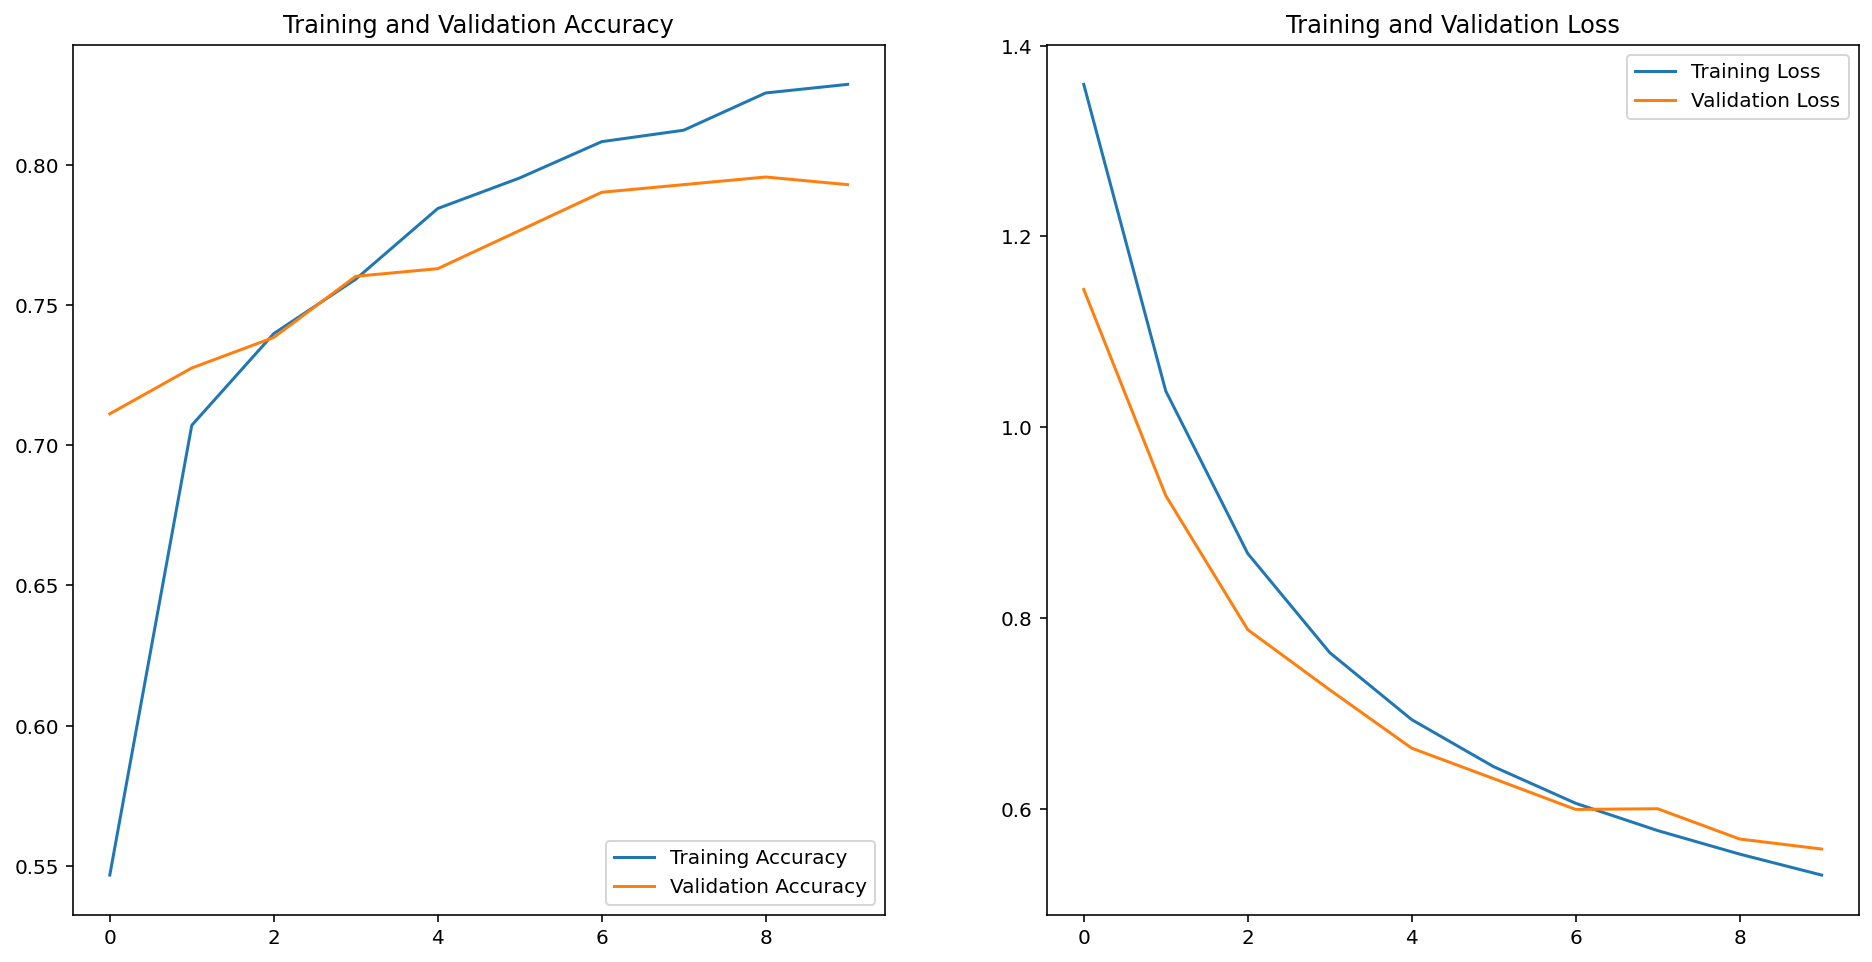

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass

predictions

array([[3.17950733e-02, 2.67463503e-03, 6.20711505e-01, 1.61116973e-01,
        1.83701798e-01],
       [8.81726444e-01, 1.12496942e-01, 4.41538729e-03, 9.41325925e-05,
        1.26713898e-03],
       [8.18810344e-01, 7.17360713e-03, 8.29678997e-02, 9.02379528e-02,
        8.10176600e-04],
       [8.83308575e-02, 4.76202630e-02, 5.67462206e-01, 6.41895225e-03,
        2.90167719e-01],
       [8.75131309e-01, 4.34965901e-02, 2.20074914e-02, 1.00311190e-02,
        4.93335612e-02],
       [8.11792135e-01, 5.15705459e-02, 4.83592525e-02, 1.42691778e-02,
        7.40088969e-02],
       [6.96944166e-03, 7.41041154e-02, 8.29491198e-01, 1.37999104e-02,
        7.56353885e-02],
       [2.87858099e-01, 3.62520181e-02, 1.51484445e-01, 9.06728804e-02,
        4.33732569e-01],
       [4.48749810e-02, 6.40895378e-05, 6.68487465e-03, 9.48188901e-01,
        1.87127356e-04],
       [9.98684824e-01, 9.67422733e-04, 1.24239377e-04, 1.10990459e-05,
        2.12444458e-04],
       [9.97155070e-01, 1.1569

In [21]:
import numpy as np
predictions = np.argmax(predictions, axis=1) # argmax returns indices of the max values along an axis.
predictions

array([2, 0, 0, 2, 0, 0, 2, 4, 3, 0, 0, 0, 3, 4, 0, 3, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 0, 4, 3, 2, 3, 0, 0])

In [22]:
count = 0   
for image, label, prediction in zip(images, labels, predictions):
  if label == prediction:
    count += 1
  
print('The model predicts correctly with', count / 32 * 100, 'of probability')    # accuracy percentage

The model predicts correctly with 68.75 of probability


### VGG16 model   
----

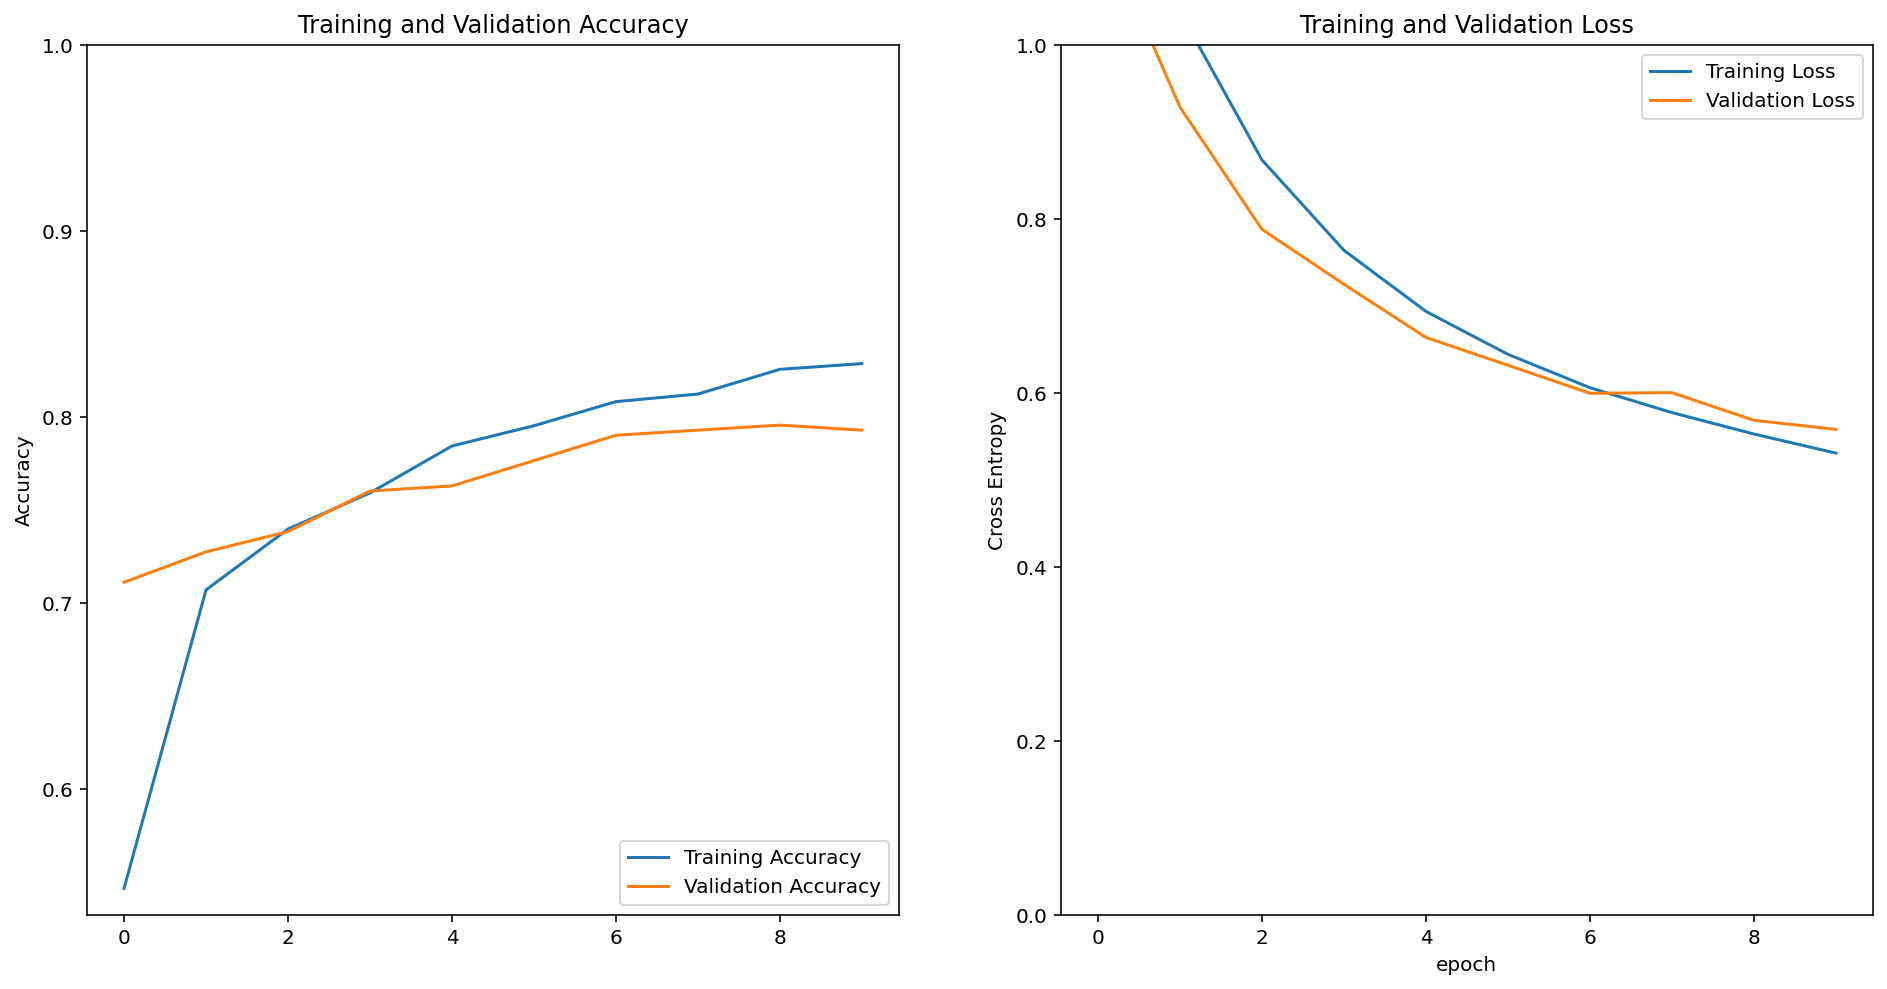

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [24]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    vgg_predictions = VGG16_model.predict(image_batch)
    pass

vgg_predictions

array([[3.12470403e-02, 7.04367012e-02, 7.20934927e-01, 6.18118942e-02,
        1.15569383e-01],
       [9.98327672e-01, 1.35801733e-03, 1.36219787e-05, 1.80342933e-04,
        1.20314529e-04],
       [7.39131570e-01, 1.41192555e-01, 2.60757543e-02, 7.29546398e-02,
        2.06455775e-02],
       [5.28461440e-03, 3.21284868e-02, 6.19092703e-01, 1.30606527e-02,
        3.30433488e-01],
       [6.56321824e-01, 2.85871953e-01, 1.90994237e-02, 1.41433710e-02,
        2.45634001e-02],
       [9.00118828e-01, 6.98573664e-02, 7.45952921e-03, 1.99497826e-02,
        2.61447951e-03],
       [2.28530504e-02, 2.55780779e-02, 7.60346532e-01, 1.19292498e-01,
        7.19298795e-02],
       [4.21214789e-01, 4.53529507e-01, 2.57055042e-03, 1.15746178e-01,
        6.93898788e-03],
       [2.24829968e-02, 6.16037473e-03, 3.90691832e-02, 8.37921262e-01,
        9.43662077e-02],
       [9.99318123e-01, 5.65474737e-04, 2.32415960e-06, 1.07285836e-04,
        6.84202496e-06],
       [9.66573060e-01, 2.7094

In [25]:
vgg_predictions = np.argmax(vgg_predictions, axis=1)
vgg_predictions

array([2, 0, 0, 2, 0, 0, 2, 1, 3, 0, 0, 3, 3, 4, 0, 3, 2, 0, 2, 4, 2, 0,
       1, 0, 1, 3, 2, 4, 4, 3, 0, 4])

In [ ]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, vgg_predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred :{prediction}\n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color': 'red'})
    else:
        plt.title(title, fontdict={'color': 'green'})
    plt.axis('off')

In [27]:
count = 0
for image, label, prediction in zip(images, labels, vgg_predictions):
    correct = label == prediction
    if correct:
        count = count + 1

print(count / 32 * 100) # 

87.5


## 5. Discussion and conclusion

## 6. Reference